# MOD 2 PROJECT - NORTHWIND DATASET

## Import libraries and set up SQL connection / engine etc

In [134]:
import statsmodels.stats.api as sms
from scipy import stats

import numpy as np

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import sqlite3
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy import inspect
from sqlalchemy.orm import Session, sessionmaker

In [135]:
connection = sqlite3.connect('Northwind_small.sqlite')
cursor = connection.cursor()

In [136]:
engine = create_engine("sqlite:///Northwind_small.sqlite", echo=False)
Session = sessionmaker(bind=engine)
session = Session()

In [137]:
#run this when working from the original Northwind_small.sqlite
cursor.execute('''ALTER TABLE [Order] RENAME TO Orders;''')

In [138]:
inspector = inspect(engine)
table_names = inspector.get_table_names()
table_names_dict = {}

for i in list(range(len(table_names))):
    table_names_dict[i] = table_names[i]
    
table_names_dict

{0: 'Category',
 1: 'Customer',
 2: 'CustomerCustomerDemo',
 3: 'CustomerDemographic',
 4: 'Employee',
 5: 'EmployeeTerritory',
 6: 'OrderDetail',
 7: 'Orders',
 8: 'Product',
 9: 'Region',
 10: 'Shipper',
 11: 'Supplier',
 12: 'Territory'}

### Create DataFrames for previewing data:

In [139]:
list_of_dfs = []

for i in table_names:
    df = pd.read_sql_query("SELECT * FROM {}".format(i), engine)
    list_of_dfs.append(df)
    
print(len(list_of_dfs))

13


Preview each dataframe by changing value of n (from 0 to 12).  

In [140]:
table_n = 6
table_title = table_names[table_n]
print(table_title)
list_of_dfs[table_n].head()

OrderDetail


,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


In [141]:
category_df = list_of_dfs[0]
customer_df = list_of_dfs[1]
customercustomerdemo_df = list_of_dfs[2]
customerdemographic_df = list_of_dfs[3]
employee_df = list_of_dfs[4]
employeeterritory_df = list_of_dfs[5]
orderdetail_df = list_of_dfs[6]
orders_df = list_of_dfs[7]
product_df = list_of_dfs[8]
region_df = list_of_dfs[9]
shipper_df = list_of_dfs[10]
supplier_df = list_of_dfs[11]
territory_df = list_of_dfs[12]

### Create a master dataframe that contains information relevant to hypothesis tests:

In [142]:
order_detail_dates = pd.merge(orderdetail_df, orders_df, how='left',
        left_on='OrderId', right_on='Id')

In [143]:
len(order_detail_dates)

2155

In [144]:
order_detail_dates.head()

,Id_x,OrderId,ProductId,UnitPrice,Quantity,Discount,Id_y,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248/11,10248,11,14.0,12,0.0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
1,10248/42,10248,42,9.8,10,0.0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
2,10248/72,10248,72,34.8,5,0.0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
3,10249/14,10249,14,18.6,9,0.0,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
4,10249/51,10249,51,42.4,40,0.0,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany


In [145]:
order_detail_prices = pd.merge(order_detail_dates, product_df, how='left',
        left_on='ProductId', right_on='Id')

In [146]:
len(order_detail_prices)

2155

In [147]:
order_detail_prices.head()

,Id_x,OrderId,ProductId,UnitPrice_x,Quantity,Discount,Id_y,CustomerId,EmployeeId,OrderDate,...,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice_y,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,10248/11,10248,11,14.0,12,0.0,10248,VINET,5,2012-07-04,...,11,Queso Cabrales,5,4,1 kg pkg.,21.00,22,30,30,0
1,10248/42,10248,42,9.8,10,0.0,10248,VINET,5,2012-07-04,...,42,Singaporean Hokkien Fried Mee,20,5,32 - 1 kg pkgs.,14.00,26,0,0,1
2,10248/72,10248,72,34.8,5,0.0,10248,VINET,5,2012-07-04,...,72,Mozzarella di Giovanni,14,4,24 - 200 g pkgs.,34.80,14,0,0,0
3,10249/14,10249,14,18.6,9,0.0,10249,TOMSP,6,2012-07-05,...,14,Tofu,6,7,40 - 100 g pkgs.,23.25,35,0,0,0
4,10249/51,10249,51,42.4,40,0.0,10249,TOMSP,6,2012-07-05,...,51,Manjimup Dried Apples,24,7,50 - 300 g pkgs.,53.00,20,0,10,0


In [148]:
order_detail_prices.columns

Index(['Id_x', 'OrderId', 'ProductId', 'UnitPrice_x', 'Quantity', 'Discount',
       'Id_y', 'CustomerId', 'EmployeeId', 'OrderDate', 'RequiredDate',
       'ShippedDate', 'ShipVia', 'Freight', 'ShipName', 'ShipAddress',
       'ShipCity', 'ShipRegion', 'ShipPostalCode', 'ShipCountry', 'Id',
       'ProductName', 'SupplierId', 'CategoryId', 'QuantityPerUnit',
       'UnitPrice_y', 'UnitsInStock', 'UnitsOnOrder', 'ReorderLevel',
       'Discontinued'],
      dtype='object')

In [149]:
cols_to_drop = ['Id_x', 'Id_y', 'RequiredDate', 'ShippedDate', 'ShipVia', 'Freight', 'ShipName', 'ShipAddress', 'ShipCity', 'ShipRegion', 'ShipPostalCode', 'ShipCountry', 'Id', 'SupplierId', 'CategoryId', 'QuantityPerUnit', 'UnitsInStock', 'UnitsOnOrder', 'ReorderLevel', 'Discontinued']

In [150]:
new_df = order_detail_prices.drop(cols_to_drop, 1)
new_df.rename(columns={'UnitPrice_x': 'SalePrice', 'UnitPrice_y': 'ListPrice'}, inplace=True)

In [151]:
len(new_df)

2155

In [152]:
main_df = pd.merge(new_df, employee_df[["Id", "FirstName"]], how='left',
        left_on='EmployeeId', right_on='Id')

In [153]:
len(main_df)

2155

In [154]:
main_df.head()

,OrderId,ProductId,SalePrice,Quantity,Discount,CustomerId,EmployeeId,OrderDate,ProductName,ListPrice,Id,FirstName
0,10248,11,14.0,12,0.0,VINET,5,2012-07-04,Queso Cabrales,21.00,5,Steven
1,10248,42,9.8,10,0.0,VINET,5,2012-07-04,Singaporean Hokkien Fried Mee,14.00,5,Steven
2,10248,72,34.8,5,0.0,VINET,5,2012-07-04,Mozzarella di Giovanni,34.80,5,Steven
3,10249,14,18.6,9,0.0,TOMSP,6,2012-07-05,Tofu,23.25,6,Michael
4,10249,51,42.4,40,0.0,TOMSP,6,2012-07-05,Manjimup Dried Apples,53.00,6,Michael


In [155]:
main_df = main_df[['OrderId', 'CustomerId', 'EmployeeId', 'FirstName', 'Quantity', 'Discount', 'OrderDate', 'ProductId', 'ProductName','SalePrice', 'ListPrice']]
main_df.head()

,OrderId,CustomerId,EmployeeId,FirstName,Quantity,Discount,OrderDate,ProductId,ProductName,SalePrice,ListPrice
0,10248,VINET,5,Steven,12,0.0,2012-07-04,11,Queso Cabrales,14.0,21.00
1,10248,VINET,5,Steven,10,0.0,2012-07-04,42,Singaporean Hokkien Fried Mee,9.8,14.00
2,10248,VINET,5,Steven,5,0.0,2012-07-04,72,Mozzarella di Giovanni,34.8,34.80
3,10249,TOMSP,6,Michael,9,0.0,2012-07-05,14,Tofu,18.6,23.25
4,10249,TOMSP,6,Michael,40,0.0,2012-07-05,51,Manjimup Dried Apples,42.4,53.00


In [156]:
main_df.loc[main_df['SalePrice'] == main_df['ListPrice'], 'OrderBeforePriceRise'] = 'No'
main_df.loc[main_df['SalePrice'] != main_df['ListPrice'], 'OrderBeforePriceRise'] = 'Yes'

### Preview the master dataframe:

In [157]:
print(len(main_df))
main_df.head()

2155


,OrderId,CustomerId,EmployeeId,FirstName,Quantity,Discount,OrderDate,ProductId,ProductName,SalePrice,ListPrice,OrderBeforePriceRise
0,10248,VINET,5,Steven,12,0.0,2012-07-04,11,Queso Cabrales,14.0,21.00,Yes
1,10248,VINET,5,Steven,10,0.0,2012-07-04,42,Singaporean Hokkien Fried Mee,9.8,14.00,Yes
2,10248,VINET,5,Steven,5,0.0,2012-07-04,72,Mozzarella di Giovanni,34.8,34.80,No
3,10249,TOMSP,6,Michael,9,0.0,2012-07-05,14,Tofu,18.6,23.25,Yes
4,10249,TOMSP,6,Michael,40,0.0,2012-07-05,51,Manjimup Dried Apples,42.4,53.00,Yes


### Check the values of the discount column:

In [158]:
main_df.Discount.unique()

array([0.  , 0.15, 0.05, 0.2 , 0.25, 0.1 , 0.02, 0.03, 0.04, 0.06, 0.01])

In [159]:
main_df = main_df.drop(main_df[main_df.Discount==0.01].index)
main_df = main_df.drop(main_df[main_df.Discount==0.06].index)
main_df = main_df.drop(main_df[main_df.Discount==0.04].index)
main_df = main_df.drop(main_df[main_df.Discount==0.03].index)
main_df = main_df.drop(main_df[main_df.Discount==0.02].index)

In [160]:
main_df.Discount.unique()

array([0.  , 0.15, 0.05, 0.2 , 0.25, 0.1 ])

In [161]:
len(main_df)

2147

# Question 1:

## Do discounts have a statistically significant effect on the number of products customers order?  If so, at what level(s) of discount?

### Null Hypothesis:

The mean number of products ordered at discounted prices is the same as the mean number of products ordered at non-discounted prices.

### Alternative Hypothesis

The mean number of products ordered at discounted prices is greater than the mean number of products ordered at non-discounted prices.

### Type of statistical test used:

One tailed t-test (greater-than)

### Data-set used:

The order quantities at the individual product-order level, where discounts are directly applied.  All dates and all order quantities are included, to maintain a uniform dataset across all 4 questions answered.

## Create data for analysis using SQL:

Delete orders with typo discounts

In [162]:
rs = cursor.execute('''SELECT Discount, COUNT(Quantity) FROM OrderDetail GROUP BY Discount;''')
df = pd.DataFrame(rs.fetchall())
df.columns = ['Discount', 'Num_Orders']
df

,Discount,Num_Orders
0,0.00,1317
1,0.01,1
2,0.02,2
3,0.03,3
4,0.04,1
5,0.05,185
6,0.06,1
7,0.10,173
8,0.15,157
9,0.20,161


In [163]:
cursor.execute('''DELETE FROM OrderDetail WHERE Discount = 0.01;''');
cursor.execute('''DELETE FROM OrderDetail WHERE Discount = 0.02;''');
cursor.execute('''DELETE FROM OrderDetail WHERE Discount = 0.03;''');
cursor.execute('''DELETE FROM OrderDetail WHERE Discount = 0.04;''');
cursor.execute('''DELETE FROM OrderDetail WHERE Discount = 0.06;''');

In [164]:
rs = cursor.execute('''SELECT Discount, COUNT(Quantity) FROM OrderDetail GROUP BY Discount;''')
df = pd.DataFrame(rs.fetchall())
df.columns = ['Discount', 'Num_Orders']
df

,Discount,Num_Orders
0,0.00,1317
1,0.05,185
2,0.10,173
3,0.15,157
4,0.20,161
5,0.25,154


### Create lists of order quantities for non-discounted and discounted products:

In [165]:
#list of qnty of products per order when no discounts are applied
all_orders_no_disc = cursor.execute('''SELECT Quantity FROM OrderDetail WHERE Discount = 0''').fetchall();
all_orders_no_disc_list = []
for i in all_orders_no_disc:
    all_orders_no_disc_list.append(i[0])

In [166]:
#list of qnty of products per order when any discount is applied
all_orders_all_disc = cursor.execute('''SELECT Quantity FROM OrderDetail WHERE Discount > 0''').fetchall();
all_orders_all_disc_list = []
for i in all_orders_all_disc:
    all_orders_all_disc_list.append(i[0])

Visualise discounted and non-discounted orders:

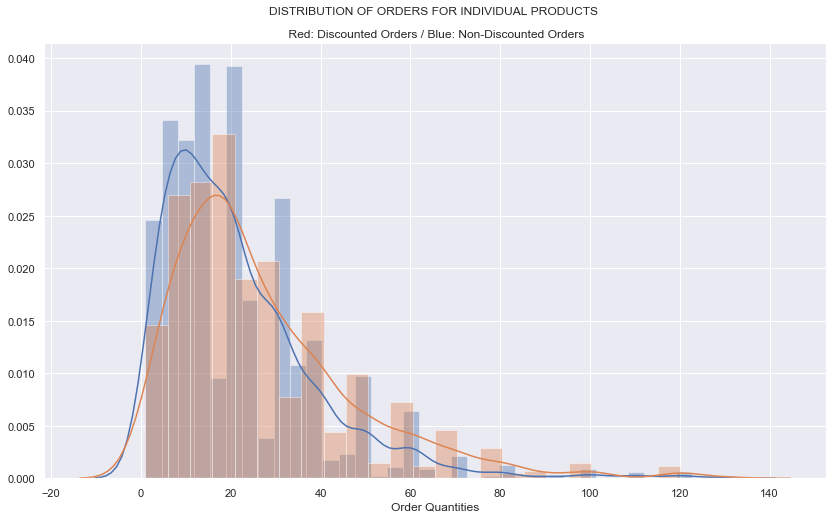

In [167]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(14,8)})

fig = sns.distplot(all_orders_no_disc_list)
fig = sns.distplot(all_orders_all_disc_list)
plt.xlabel("Order Quantities")
plt.title("DISTRIBUTION OF ORDERS FOR INDIVIDUAL PRODUCTS \n \n Red: Discounted Orders / Blue: Non-Discounted Orders");

# Set significance level (alpha)

In [168]:
alpha = 0.05

## Power simulation: sample size requirements for a given effect size

In [169]:
no_disc_mean = np.array(all_orders_no_disc_list).mean()

print('The average number of orders when no discounts are in place is: ' + str(round(no_disc_mean, 2)) + '\n')

mean_to_detect = np.array(all_orders_all_disc_list).mean()

print('The average number of orders at discounted prices is: ' + str(round(mean_to_detect, 2)) + '.\n\nWhat sample size would be required to detect this difference 95% of the time at an alpha level of ' + str(alpha) + '?')

The average number of orders when no discounts are in place is: 21.72

The average number of orders at discounted prices is: 27.35.

What sample size would be required to detect this difference 95% of the time at an alpha level of 0.05?


In [170]:
std_dev_no_disc = np.array(all_orders_no_disc_list).std()
std_dev_disc = np.array(all_orders_all_disc_list).std()

print('The std deviation of the non-discounted orders is: ' + str(std_dev_no_disc))
print('The std deviation of the disounted orders is: ' + str(std_dev_disc))

The std deviation of the non-discounted orders is: 17.500845477669806
The std deviation of the disounted orders is: 20.708180684895275


In [171]:
target = 0.95
sample_size  = 100
current = 0
n_sim = 800

In [172]:
np.random.seed(10)

power_sample = [] 

while current < target:
    data = np.empty([n_sim, sample_size, 2])
    data.fill(np.nan)

    # For non-discounted orders
    data[:,:,0] = np.random.normal(loc=no_disc_mean, scale=std_dev_no_disc, size=[n_sim, sample_size])

    # For discounted orders
    data[:,:,1] = np.random.normal(loc=mean_to_detect, scale=std_dev_disc, size=[n_sim, sample_size])

    result = stats.ttest_ind(data[:, :, 0],data[:, :, 1],axis=1)
    p = result[1] 
    # Number of simulations where the null hypothesis was rejected

    rejects = np.sum(p/2 < alpha)

    # Calculate reject proportion

    reject_proportion = rejects/ float(n_sim) 
    current = reject_proportion 
    print ("Number of Samples:", sample_size,", Calculated Power =", current)
    power_sample.append([sample_size, current]) 
   
    # increase the number of samples for the next iteration of the loop
    sample_size += 10
    
power_sample[-1]

Number of Samples: 100 , Calculated Power = 0.66
Number of Samples: 110 , Calculated Power = 0.7175
Number of Samples: 120 , Calculated Power = 0.71
Number of Samples: 130 , Calculated Power = 0.75375
Number of Samples: 140 , Calculated Power = 0.76875
Number of Samples: 150 , Calculated Power = 0.8125
Number of Samples: 160 , Calculated Power = 0.81125
Number of Samples: 170 , Calculated Power = 0.84875
Number of Samples: 180 , Calculated Power = 0.88
Number of Samples: 190 , Calculated Power = 0.86875
Number of Samples: 200 , Calculated Power = 0.90375
Number of Samples: 210 , Calculated Power = 0.9275
Number of Samples: 220 , Calculated Power = 0.925
Number of Samples: 230 , Calculated Power = 0.9425
Number of Samples: 240 , Calculated Power = 0.94375
Number of Samples: 250 , Calculated Power = 0.94875
Number of Samples: 260 , Calculated Power = 0.94875
Number of Samples: 270 , Calculated Power = 0.94875
Number of Samples: 280 , Calculated Power = 0.96875


[280, 0.96875]

Set required sample size:

In [173]:
sample_size_req = power_sample[-1][0]
sample_size_req

280

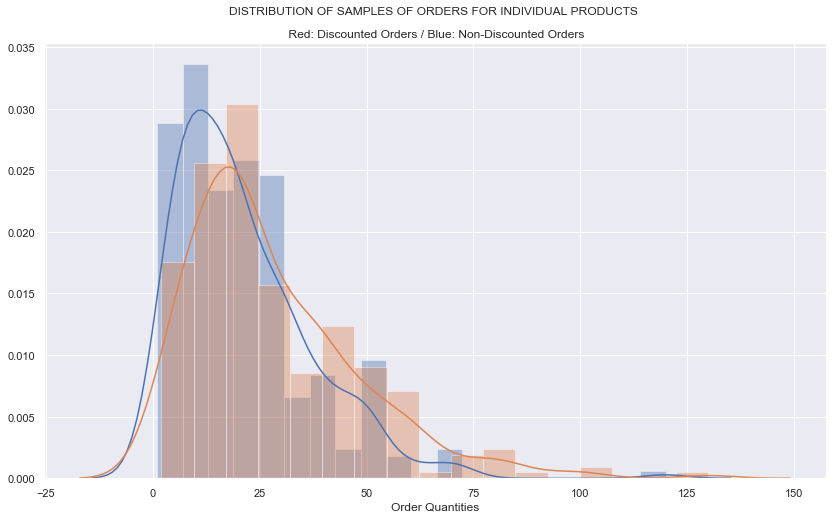

In [174]:
sample_size_req = power_sample[-1][0]
no_disc_sample = np.random.choice(all_orders_no_disc_list, sample_size_req)
all_disc_sample = np.random.choice(all_orders_all_disc_list, sample_size_req)

sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(14,8)})

fig = sns.distplot(no_disc_sample)
fig = sns.distplot(all_disc_sample)
plt.xlabel("Order Quantities")
plt.title("DISTRIBUTION OF SAMPLES OF ORDERS FOR INDIVIDUAL PRODUCTS \n \n Red: Discounted Orders / Blue: Non-Discounted Orders");


## Perform t-test:

To reject the null hypothesis, the t_statistic must be > 0 and p/2 < alpha.

In [250]:
def one_tailed_t_test(test_if_greater,control):
    """ Runs a two tailed t-test on the two samples, and compares p_value/2 to alpha for a 1-tailed result.
    
    Prints a description of results. The first parameter/sample should have a higher mean than the second for correct output.
    
    """
    
    t_stat, p_value = stats.ttest_ind(test_if_greater, control)
    
    if t_stat > 0:
        print('The mean of sample_b is greater than the mean of sample_a.')
    else:
        print('The mean of sample_b is lower than the mean of sample_a.')
    if p_value/2 < alpha:
        print('The one-tailed p_value of ' + str(p_value/2) + ' is less than ' + str(alpha) + ' so the difference is statistically significant. \n')
    else:
        print('The one-tailed p_value of ' + str(p_value/2) + ' is NOT less than ' + str(alpha) + ' so the difference is not statistically significant. \n')

In [251]:
sample_a = no_disc_sample
sample_b = all_disc_sample 
one_tailed_t_test(sample_b, sample_a)

The mean of sample_b is greater than the mean of sample_a.
The one-tailed p_value of 6.847727925662131e-07 is less than 0.05 so the difference is statistically significant. 



Perform t-test 100 times with different samples to check results:

In [177]:
reject_null_count = 0
fail_to_reject_count = 0
for i in list(range(100)):
    no_disc_sample = np.random.choice(all_orders_no_disc_list, sample_size_req)
    all_disc_sample = np.random.choice(all_orders_all_disc_list, sample_size_req)
    a, b = stats.ttest_ind(all_disc_sample, no_disc_sample)
    if b/2 < alpha:
        reject_null_count += 1
    else:
        fail_to_reject_count += 1

In [178]:
print('After 100 trials the null hypothesis is rejected ' + str(reject_null_count) + ' times')

After 100 trials the null hypothesis is rejected 99 times


### Question 1 Part 1 Conclusion - There is sufficience evidence to suggest that discounts result in customers ordering a higher number of products.

## Question 1 part 2: 
## At what levels of discounts are the increases in order quantities significant?

In [179]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [180]:
disc_5 = cursor.execute('''SELECT Quantity FROM OrderDetail WHERE Discount = 0.05''').fetchall();
disc_5_list = []
for i in disc_5:
    disc_5_list.append(i[0])
len(disc_5_list)

185

In [181]:
disc_10 = cursor.execute('''SELECT Quantity FROM OrderDetail WHERE Discount = 0.10''').fetchall();
disc_10_list = []
for i in disc_10:
    disc_10_list.append(i[0])
len(disc_10_list)

173

In [182]:
disc_15 = cursor.execute('''SELECT Quantity FROM OrderDetail WHERE Discount = 0.15''').fetchall();
disc_15_list = []
for i in disc_15:
    disc_15_list.append(i[0])
len(disc_15_list)

157

In [183]:
disc_20 = cursor.execute('''SELECT Quantity FROM OrderDetail WHERE Discount = 0.20''').fetchall();
disc_20_list = []
for i in disc_20:
    disc_20_list.append(i[0])
len(disc_20_list)

161

In [184]:
disc_25 = cursor.execute('''SELECT Quantity FROM OrderDetail WHERE Discount = 0.25''').fetchall();
disc_25_list = []
for i in disc_25:
    disc_25_list.append(i[0])
len(disc_25_list)

154

In [185]:
disc_none = cursor.execute('''SELECT Quantity FROM OrderDetail WHERE Discount = 0''').fetchall();
disc_none_list = []
for i in disc_none:
    disc_none_list.append(i[0])
len(disc_none_list)

1317

In [186]:
v = np.concatenate([np.array(disc_none_list), np.array(disc_5_list), np.array(disc_10_list), np.array(disc_15_list), np.array(disc_20_list), np.array(disc_25_list)])

In [187]:
v_labels = ['no_disc_list'] * len(disc_none_list) + ['5pct'] * len(disc_5_list) + ['10pct'] * len(disc_10_list) + ['15pct'] * len(disc_15_list) + ['20pct'] * len(disc_20_list) + ['25pct'] * len(disc_25_list)

Comparison of discount levels against all non_discounted orders (1317)

In [188]:
print(pairwise_tukeyhsd(v, v_labels, 0.05))

 Multiple Comparison of Means - Tukey HSD,FWER=0.05 
group1    group2    meandiff  lower    upper  reject
----------------------------------------------------
10pct     15pct      3.1452   -2.771   9.0613 False 
10pct     20pct      1.7879  -4.0896   7.6653 False 
10pct     25pct      3.0033   -2.943   8.9496 False 
10pct      5pct      2.7738  -2.9028   8.4504 False 
10pct  no_disc_list -3.5217  -7.8622   0.8187 False 
15pct     20pct     -1.3573  -7.3775   4.6628 False 
15pct     25pct     -0.1419  -6.2292   5.9454 False 
15pct      5pct     -0.3714  -6.1955   5.4528 False 
15pct  no_disc_list -6.6669  -11.1986 -2.1352  True 
20pct     25pct      1.2154  -4.8343   7.2652 False 
20pct      5pct      0.986   -4.7989   6.7708 False 
20pct  no_disc_list -5.3096  -9.7907  -0.8285  True 
25pct      5pct     -0.2294  -6.0842   5.6253 False 
25pct  no_disc_list  -6.525  -11.096   -1.954  True 
 5pct  no_disc_list -6.2955  -10.5097 -2.0814  True 
----------------------------------------------

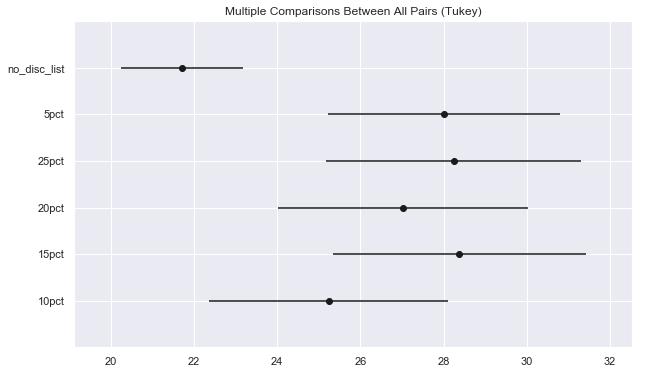

In [189]:
tukey_viz = MultiComparison(v, v_labels)
results = tukey_viz.tukeyhsd(alpha=0.05)
x = results.plot_simultaneous()

Establish sample size required to detect the effect size at 10%.

In [190]:
disc_10_mean, disc_10_std = np.mean(disc_10_list), np.std(disc_10_list)

disc_10_mean, disc_10_std

(25.23699421965318, 21.125181975751996)

In [191]:
target = 0.95
sample_size  = 500
current = 0
n_sim = 800

In [192]:
np.random.seed(10)

power_sample = [] 

while current < target:
    data = np.empty([n_sim, sample_size, 2])
    data.fill(np.nan)

    # For non-discounted orders
    data[:,:,0] = np.random.normal(loc=no_disc_mean, scale=std_dev_no_disc, size=[n_sim, sample_size])

    # For 10% discounted orders
    data[:,:,1] = np.random.normal(loc=disc_10_mean, scale=disc_10_std, size=[n_sim, sample_size])

    result = stats.ttest_ind(data[:, :, 0],data[:, :, 1],axis=1)
    p = result[1] 
    # Number of simulations where the null hypothesis was rejected

    rejects = np.sum(p/2 < alpha)

    # Calculate reject proportion

    reject_proportion = rejects/ float(n_sim) 
    current = reject_proportion 
    print ("Number of Samples:", sample_size,", Calculated Power =", current)
    power_sample.append([sample_size, current]) 
   
    # increase the number of samples for the next iteration of the loop
    sample_size += 20
    
power_sample[-1]

Number of Samples: 500 , Calculated Power = 0.88625
Number of Samples: 520 , Calculated Power = 0.90375
Number of Samples: 540 , Calculated Power = 0.9125
Number of Samples: 560 , Calculated Power = 0.925
Number of Samples: 580 , Calculated Power = 0.91875
Number of Samples: 600 , Calculated Power = 0.93375
Number of Samples: 620 , Calculated Power = 0.93625
Number of Samples: 640 , Calculated Power = 0.945
Number of Samples: 660 , Calculated Power = 0.95375


[660, 0.95375]

The sample size required to detect the effect size at 10% discount is too large given the data available.

How suitable are the other sample sizes (check largest effect size).

In [269]:
disc_15_mean, disc_15_std = np.mean(disc_15_list), np.std(disc_15_list)

disc_15_mean, disc_15_std

(28.38216560509554, 20.85635892029252)

In [270]:
target = 0.95
sample_size  = 150
current = 0
n_sim = 800

In [271]:
np.random.seed(10)

power_sample = [] 

while current < target:
    data = np.empty([n_sim, sample_size, 2])
    data.fill(np.nan)

    # For non-discounted orders
    data[:,:,0] = np.random.normal(loc=no_disc_mean, scale=std_dev_no_disc, size=[n_sim, sample_size])

    # For 10% discounted orders
    data[:,:,1] = np.random.normal(loc=disc_15_mean, scale=disc_15_std, size=[n_sim, sample_size])

    result = stats.ttest_ind(data[:, :, 0],data[:, :, 1],axis=1)
    p = result[1] 
    # Number of simulations where the null hypothesis was rejected

    rejects = np.sum(p/2 < alpha)

    # Calculate reject proportion

    reject_proportion = rejects/ float(n_sim) 
    current = reject_proportion 
    print ("Number of Samples:", sample_size,", Calculated Power =", current)
    power_sample.append([sample_size, current]) 
   
    # increase the number of samples for the next iteration of the loop
    sample_size += 20
    
power_sample[-1]

Number of Samples: 150 , Calculated Power = 0.92
Number of Samples: 170 , Calculated Power = 0.9275
Number of Samples: 190 , Calculated Power = 0.9575


[190, 0.9575]

The sample sizes are not quite large enough to have 95% confidence in the results, however tjey can be assumed to be representative because they are very close to the required sample size.

### Question 1 Part 2 Conclusion - Assuming the data is representative, there is sufficience evidence to suggest that discounts result in customers ordering a higher number of products at all levels of discount except for 10%.

# Question 2:

## Does the price rise on 7th April 2013 have a statistically significant effect on the number of orders placed, including both discounted and non-discounted products?

### Null Hypothesis:

The mean number of orders after the 7th April 2013 is the same as the mean number of orders before 7th April 2014.

### Alternative Hypothesis

The mean number of orders after the 7th April 2013 is less than the mean number of orders before 7th April 2014.


### Type of statistical test used:

One tailed t-test (less-than)

### Data-set used:

The order quantities at the individual product-order level, before and after 7th April 2013.  All dates and all order quantities are included, to maintain a uniform dataset across all 4 questions answered.

### How to determine 7th April 2013 as the date of a price rise:  

The order date and the orderId are sequential - both are arranged in chronological order.  The sale price of each order can be compared to the 'list price' of the product as defined in the product table.  The data can be divided into two groups: one where the list price is higher than the sale price, and another where they are the same.  It is clear that the 7th of April 2013 is the point where one group ends and the next begins.

In [193]:
main_df.loc[main_df['SalePrice'] == main_df['ListPrice'], 'OrderBeforePriceRise'] = 'No'
main_df.loc[main_df['SalePrice'] != main_df['ListPrice'], 'OrderBeforePriceRise'] = 'Yes'
main_df.head()

,OrderId,CustomerId,EmployeeId,FirstName,Quantity,Discount,OrderDate,ProductId,ProductName,SalePrice,ListPrice,OrderBeforePriceRise
0,10248,VINET,5,Steven,12,0.0,2012-07-04,11,Queso Cabrales,14.0,21.00,Yes
1,10248,VINET,5,Steven,10,0.0,2012-07-04,42,Singaporean Hokkien Fried Mee,9.8,14.00,Yes
2,10248,VINET,5,Steven,5,0.0,2012-07-04,72,Mozzarella di Giovanni,34.8,34.80,No
3,10249,TOMSP,6,Michael,9,0.0,2012-07-05,14,Tofu,18.6,23.25,Yes
4,10249,TOMSP,6,Michael,40,0.0,2012-07-05,51,Manjimup Dried Apples,42.4,53.00,Yes


In [194]:
old_prices_df = main_df.loc[main_df['OrderBeforePriceRise'] == 'Yes']
list_prices_df = main_df.loc[main_df['OrderBeforePriceRise'] == 'No']

In [195]:
old_prices_df.tail()

,OrderId,CustomerId,EmployeeId,FirstName,Quantity,Discount,OrderDate,ProductId,ProductName,SalePrice,ListPrice,OrderBeforePriceRise
654,10495,LAUGB,3,Janet,5,0.00,2013-04-03,77,Original Frankfurter grüne Soße,10.4,13.0,Yes
655,10496,TRADH,7,Robert,20,0.05,2013-04-04,31,Gorgonzola Telino,10.0,12.5,Yes
656,10497,LEHMS,7,Robert,14,0.00,2013-04-04,56,Gnocchi di nonna Alice,30.4,38.0,Yes
657,10497,LEHMS,7,Robert,25,0.00,2013-04-04,72,Mozzarella di Giovanni,27.8,34.8,Yes
658,10497,LEHMS,7,Robert,25,0.00,2013-04-04,77,Original Frankfurter grüne Soße,10.4,13.0,Yes


There is one order where the sale date is before April 7th 2013 but the list price and sale price are the same.  This can be regarded as a data entry error and be deleted:

In [196]:
list_prices_df.head()

,OrderId,CustomerId,EmployeeId,FirstName,Quantity,Discount,OrderDate,ProductId,ProductName,SalePrice,ListPrice,OrderBeforePriceRise
2,10248,VINET,5,Steven,5,0.0,2012-07-04,72,Mozzarella di Giovanni,34.8,34.8,No
659,10498,HILAA,8,Laura,14,0.0,2013-04-07,24,Guaraná Fantástica,4.5,4.5,No
660,10498,HILAA,8,Laura,5,0.0,2013-04-07,40,Boston Crab Meat,18.4,18.4,No
661,10498,HILAA,8,Laura,30,0.0,2013-04-07,42,Singaporean Hokkien Fried Mee,14.0,14.0,No
662,10499,LILAS,4,Margaret,20,0.0,2013-04-08,28,Rössle Sauerkraut,45.6,45.6,No


In [197]:
list_prices_df_adj = list_prices_df.drop(index = 2)
list_prices_df_adj.head()

,OrderId,CustomerId,EmployeeId,FirstName,Quantity,Discount,OrderDate,ProductId,ProductName,SalePrice,ListPrice,OrderBeforePriceRise
659,10498,HILAA,8,Laura,14,0.0,2013-04-07,24,Guaraná Fantástica,4.5,4.5,No
660,10498,HILAA,8,Laura,5,0.0,2013-04-07,40,Boston Crab Meat,18.4,18.4,No
661,10498,HILAA,8,Laura,30,0.0,2013-04-07,42,Singaporean Hokkien Fried Mee,14.0,14.0,No
662,10499,LILAS,4,Margaret,20,0.0,2013-04-08,28,Rössle Sauerkraut,45.6,45.6,No
663,10499,LILAS,4,Margaret,25,0.0,2013-04-08,49,Maxilaku,20.0,20.0,No


## Power simulation for question 2

What sample size is required to detect the difference between the mean order quantity before and after price rise?

In [198]:
old_prices_mean, old_prices_std = old_prices_df.Quantity.mean(), old_prices_df.Quantity.std()
old_prices_mean, old_prices_std

(24.533434650455927, 18.24139522912545)

In [199]:
list_price_mean, list_price_std = list_prices_df_adj.Quantity.mean(), list_prices_df_adj.Quantity.std()

list_price_mean, list_price_std

(23.625672043010752, 19.339088287598575)

In [200]:
target = 0.95
sample_size  = 7000
current = 0
n_sim = 800

In [201]:
np.random.seed(10)

power_sample = [] 

while current < target:
    data = np.empty([n_sim, sample_size, 2])
    data.fill(np.nan)

    # For non-discounted orders
    data[:,:,0] = np.random.normal(loc=old_prices_mean, scale=old_prices_std, size=[n_sim, sample_size])
    
    # For discounted orders
    data[:,:,1] = np.random.normal(loc=list_price_mean, scale=list_price_std, size=[n_sim, sample_size])

    result = stats.ttest_ind(data[:, :, 0],data[:, :, 1],axis=1)
    p = result[1] 
    # Number of simulations where the null hypothesis was rejected

    rejects = np.sum(p/2 < alpha)

    # Calculate reject proportion

    reject_proportion = rejects/ float(n_sim) 
    current = reject_proportion 
    print ("Number of Samples:", sample_size,", Calculated Power =", current)
    power_sample.append([sample_size, current]) 
   
    # increase the number of samples for the next iteration of the loop
    sample_size += 500
    
power_sample[-1]

Number of Samples: 7000 , Calculated Power = 0.87375
Number of Samples: 7500 , Calculated Power = 0.90875
Number of Samples: 8000 , Calculated Power = 0.92
Number of Samples: 8500 , Calculated Power = 0.92875
Number of Samples: 9000 , Calculated Power = 0.9425
Number of Samples: 9500 , Calculated Power = 0.9475
Number of Samples: 10000 , Calculated Power = 0.96625


[10000, 0.96625]

The available sample sizes are too small to confidently detect the difference between the two means. 

However, the t-test can calculated using all available data:

In [202]:
qnty_before_price_rise = list(old_prices_df.Quantity)
qnty_after_price_rise = list(list_prices_df_adj.Quantity)
print(len(qnty_before_price_rise))
print(len(qnty_after_price_rise))

658
1488


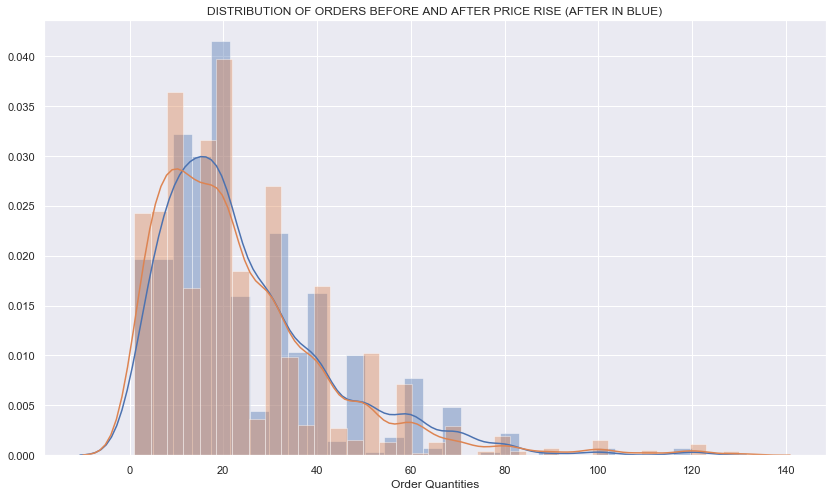

In [259]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(14,8)})

fig = sns.distplot(qnty_before_price_rise)
fig = sns.distplot(qnty_after_price_rise)
plt.xlabel("Order Quantities")
plt.title("DISTRIBUTION OF ORDERS BEFORE AND AFTER PRICE RISE (AFTER IN BLUE)");

In [204]:
sample_a = qnty_before_price_rise
sample_b = qnty_after_price_rise
one_tailed_t_test(sample_b, sample_a)

The mean of sample_b is lower than the mean of sample_a.
The one-tailed p_value of 0.15392061541637697 is NOT less than 0.05 so the difference is not statistically significant. 



### Question 2 Conclusion - There is not sufficient evidence to suggest that the price rise on 7th April 2014 resulted in customers placing orders of smaller quantities.

## Question 3 Does the sales person have a statistically significant effect on the number of products ordered?

### Null Hypothesis:

The mean number of products ordered per order is the same for each salesperson.

### Alternative Hypothesis

The mean number of products ordered per order is different for each salesperson.

### Type of statistical test used:

Tukeys comparison of means

### Data-set used:

The order quantities at the individual product-order level, for each salesperson.  All dates and all order quantities are included, to maintain a uniform dataset across all 4 questions answered.

Match employee Names to EmployeeIds

In [205]:
a = employee_df.groupby('FirstName').min()[['Id']]
a.sort_values(by=['Id'])

,Id
FirstName,
Nancy,1
Andrew,2
Janet,3
Margaret,4
Steven,5
Michael,6
Robert,7
Laura,8
Anne,9


In [206]:
employee_sales_df = main_df.groupby('FirstName').count()[['Quantity']]
employee_sales_df

,Quantity
FirstName,
Andrew,241
Anne,107
Janet,321
Laura,260
Margaret,420
Michael,168
Nancy,337
Robert,176
Steven,117


In [207]:
sales_lists = []

Build a list of sales lists in order of employee ID:

In [208]:
nancy = cursor.execute('''
SELECT [OrderDetail].Quantity
FROM [OrderDetail]
JOIN [Orders]
ON [OrderDetail].OrderId = [Orders].Id
JOIN [Employee]
ON [Orders].EmployeeId = [Employee].Id
WHERE Orders.EmployeeId = 1 ;
''').fetchall();

nancy_list = []
for i in nancy:
    nancy_list.append(i[0])

sales_lists.append(nancy_list)
    
len(nancy_list), len(sales_lists)

(337, 1)

In [209]:
andrew = cursor.execute('''
SELECT [OrderDetail].Quantity
FROM [OrderDetail]
JOIN [Orders]
ON [OrderDetail].OrderId = [Orders].Id
JOIN [Employee]
ON [Orders].EmployeeId = [Employee].Id
WHERE Orders.EmployeeId = 2 ;
''').fetchall();

andrew_list = []
for i in andrew:
    andrew_list.append(i[0])

sales_lists.append(andrew_list)
    
len(andrew_list), len(sales_lists)

(241, 2)

In [210]:
janet = cursor.execute('''
SELECT [OrderDetail].Quantity
FROM [OrderDetail]
JOIN [Orders]
ON [OrderDetail].OrderId = [Orders].Id
JOIN [Employee]
ON [Orders].EmployeeId = [Employee].Id
WHERE Orders.EmployeeId = 3 ;
''').fetchall();

janet_list = []
for i in janet:
    janet_list.append(i[0])

sales_lists.append(janet_list)
    
len(janet_list), len(sales_lists)

(321, 3)

In [211]:
margaret = cursor.execute('''
SELECT [OrderDetail].Quantity
FROM [OrderDetail]
JOIN [Orders]
ON [OrderDetail].OrderId = [Orders].Id
JOIN [Employee]
ON [Orders].EmployeeId = [Employee].Id
WHERE Orders.EmployeeId = 4 ;
''').fetchall();

margaret_list = []
for i in margaret:
    margaret_list.append(i[0])

sales_lists.append(margaret_list)
    
len(margaret_list), len(sales_lists)

(420, 4)

In [212]:
steven = cursor.execute('''
SELECT [OrderDetail].Quantity
FROM [OrderDetail]
JOIN [Orders]
ON [OrderDetail].OrderId = [Orders].Id
JOIN [Employee]
ON [Orders].EmployeeId = [Employee].Id
WHERE Orders.EmployeeId = 5 ;
''').fetchall();

steven_list = []
for i in steven:
    steven_list.append(i[0])

sales_lists.append(steven_list)
    
len(steven_list), len(sales_lists)

(117, 5)

In [213]:
michael = cursor.execute('''
SELECT [OrderDetail].Quantity
FROM [OrderDetail]
JOIN [Orders]
ON [OrderDetail].OrderId = [Orders].Id
JOIN [Employee]
ON [Orders].EmployeeId = [Employee].Id
WHERE Orders.EmployeeId = 6 ;
''').fetchall();

michael_list = []
for i in michael:
    michael_list.append(i[0])

sales_lists.append(michael_list)
    
len(michael_list), len(sales_lists)

(168, 6)

In [214]:
robert = cursor.execute('''
SELECT [OrderDetail].Quantity
FROM [OrderDetail]
JOIN [Orders]
ON [OrderDetail].OrderId = [Orders].Id
JOIN [Employee]
ON [Orders].EmployeeId = [Employee].Id
WHERE Orders.EmployeeId = 7 ;
''').fetchall();

robert_list = []
for i in robert:
    robert_list.append(i[0])

sales_lists.append(robert_list)
    
len(robert_list), len(sales_lists)

(176, 7)

In [215]:
laura = cursor.execute('''
SELECT [OrderDetail].Quantity
FROM [OrderDetail]
JOIN [Orders]
ON [OrderDetail].OrderId = [Orders].Id
JOIN [Employee]
ON [Orders].EmployeeId = [Employee].Id
WHERE Orders.EmployeeId = 8 ;
''').fetchall();

laura_list = []
for i in laura:
    laura_list.append(i[0])

sales_lists.append(laura_list)
    
len(laura_list), len(sales_lists)

(260, 8)

In [216]:
anne = cursor.execute('''
SELECT [OrderDetail].Quantity
FROM [OrderDetail]
JOIN [Orders]
ON [OrderDetail].OrderId = [Orders].Id
JOIN [Employee]
ON [Orders].EmployeeId = [Employee].Id
WHERE Orders.EmployeeId = 9 ;
''').fetchall();

anne_list = []
for i in anne:
    anne_list.append(i[0])

sales_lists.append(anne_list)
    
len(anne_list), len(sales_lists)

(107, 9)

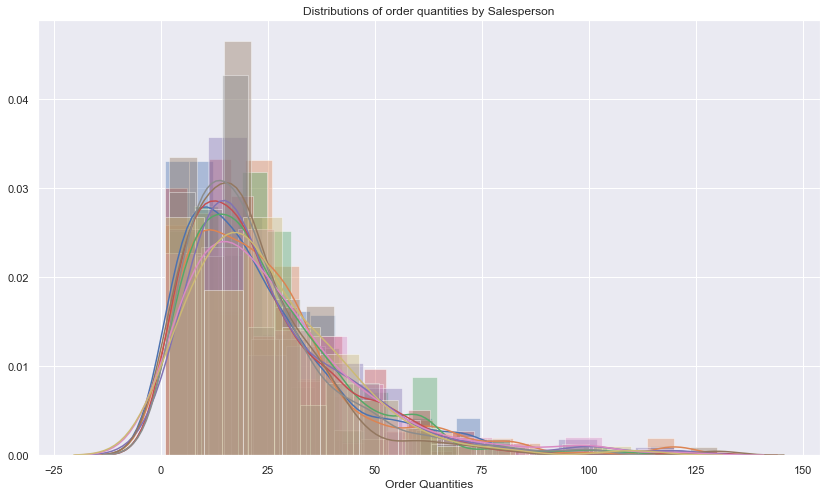

In [217]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(14,8)})

fig = sns.distplot(sales_lists[0])
fig = sns.distplot(sales_lists[1])
fig = sns.distplot(sales_lists[2])
fig = sns.distplot(sales_lists[3])
fig = sns.distplot(sales_lists[4])
fig = sns.distplot(sales_lists[5])
fig = sns.distplot(sales_lists[6])
fig = sns.distplot(sales_lists[7])
fig = sns.distplot(sales_lists[8])
plt.xlabel("Order Quantities")
plt.title("Distributions of order quantities by Salesperson");

In [218]:
list_of_names = []

a = employee_df.groupby('FirstName').min()[['Id']]
b = a.sort_values(by=['Id'])
for i in b.index:
    list_of_names.append(i)
    
list_of_names

['Nancy',
 'Andrew',
 'Janet',
 'Margaret',
 'Steven',
 'Michael',
 'Robert',
 'Laura',
 'Anne']

In [219]:
dict_of_sales = {}

for i in list(range(len(list_of_names))):
    dict_of_sales[list_of_names[i]] = len(sales_lists[i])

In [220]:
dict_of_sales

{'Nancy': 337,
 'Andrew': 241,
 'Janet': 321,
 'Margaret': 420,
 'Steven': 117,
 'Michael': 168,
 'Robert': 176,
 'Laura': 260,
 'Anne': 107}

In [221]:
x = np.concatenate(sales_lists)

In [222]:
x_labels = ['Nancy'] * len(sales_lists[0]) + ['Andrew'] * len(sales_lists[1]) + ['Janet'] * len(sales_lists[2]) + ['Margaret'] * len(sales_lists[3]) + ['Steven'] * len(sales_lists[4]) + ['Michael'] * len(sales_lists[5]) + ['Robert'] * len(sales_lists[6]) + ['Laura'] * len(sales_lists[7]) + ['Anne'] * len(sales_lists[8])

In [223]:
print(pairwise_tukeyhsd(x, x_labels, 0.05))

Multiple Comparison of Means - Tukey HSD,FWER=0.05
 group1   group2  meandiff  lower    upper  reject
--------------------------------------------------
 Andrew    Anne   -0.1712  -7.0216   6.6792 False 
 Andrew   Janet   -0.6634  -5.6895   4.3627 False 
 Andrew   Laura   -2.3822  -7.6551   2.8907 False 
 Andrew  Margaret -1.7959  -6.5612   2.9694 False 
 Andrew  Michael  -4.1304  -10.0573  1.7964 False 
 Andrew   Nancy    -1.985  -6.9597   2.9897 False 
 Andrew   Robert   1.3187  -4.5282   7.1656 False 
 Andrew   Steven   0.8242  -5.8203   7.4688 False 
  Anne    Janet   -0.4922  -7.0749   6.0905 False 
  Anne    Laura    -2.211  -8.9839   4.562  False 
  Anne   Margaret -1.6247  -8.0105   4.7611 False 
  Anne   Michael  -3.9592  -11.2529  3.3344 False 
  Anne    Nancy   -1.8138  -8.3573   4.7297 False 
  Anne    Robert   1.4899   -5.739   8.7188 False 
  Anne    Steven   0.9954  -6.8925   8.8834 False 
 Janet    Laura   -1.7188  -6.6389   3.2014 False 
 Janet   Margaret -1.1325  -5.5

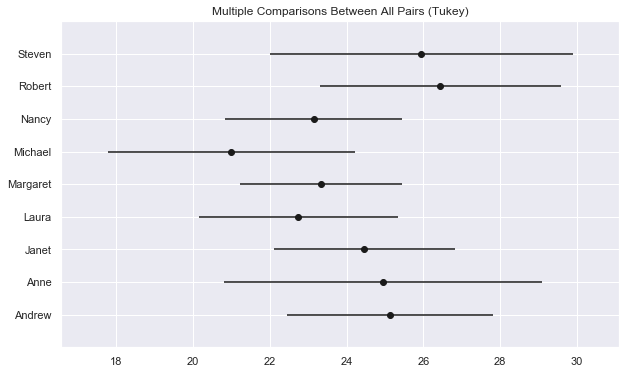

In [224]:
tukey_viz = MultiComparison(x, x_labels)
results = tukey_viz.tukeyhsd(alpha=0.05)
x = results.plot_simultaneous()

### Conclusion: There is not sufficience evidence to suggest that the salesperson has a significant effect on the number of products customers order.

## Power simulation for question 3

Check to see the required sample size to detect difference between highest and lowest mean number of orders per sales person. 

In [225]:
employee_sales_df = main_df.groupby('FirstName').mean()[['Quantity']]
employee_sales_df.sort_values(by=["Quantity"])

,Quantity
FirstName,
Michael,20.994048
Laura,22.742308
Nancy,23.139466
Margaret,23.328571
Janet,24.461059
Anne,24.953271
Andrew,25.124481
Steven,25.948718
Robert,26.443182


In [226]:
michael_sales = main_df.loc[main_df["FirstName"]=='Michael']
robert_sales = main_df.loc[main_df["FirstName"]=='Robert']

robert_mean, robert_std = robert_sales.Quantity.mean(), robert_sales.Quantity.std()
michael_mean, michael_std = michael_sales.Quantity.mean(), michael_sales.Quantity.std()
print("Robert mean & std_dev: " + str(robert_mean) + " " + str(robert_std))
print("Michael mean & std_dev: " + str(michael_mean) + " " + str(michael_std))
print("Qnty sales: Michael, Robert: " + str(len(michael_sales)) + " " + str(len(robert_sales)))

Robert mean & std_dev: 26.443181818181817 21.185093387053595
Michael mean & std_dev: 20.99404761904762 16.69468595713318
Qnty sales: Michael, Robert: 168 176


In [227]:
target = 0.95
sample_size  = 100
current = 0
n_sim = 800

In [228]:
np.random.seed(10)

power_sample = [] 

while current < target:
    data = np.empty([n_sim, sample_size, 2])
    data.fill(np.nan)

    # Michael
    data[:,:,0] = np.random.normal(loc=michael_mean, scale=michael_std, size=[n_sim, sample_size])

    # Robert
    data[:,:,1] = np.random.normal(loc=robert_mean, scale=robert_std, size=[n_sim, sample_size])

    result = stats.ttest_ind(data[:, :, 0],data[:, :, 1],axis=1)
    p = result[1] 
    # Number of simulations where the null hypothesis was rejected

    rejects = np.sum(p/2 < alpha)

    # Calculate reject proportion

    reject_proportion = rejects/ float(n_sim) 
    current = reject_proportion 
    print ("Number of Samples:", sample_size,", Calculated Power =", current)
    power_sample.append([sample_size, current]) 
   
    # increase the number of samples for the next iteration of the loop
    sample_size += 20
    
power_sample[-1]

Number of Samples: 100 , Calculated Power = 0.63875
Number of Samples: 120 , Calculated Power = 0.73625
Number of Samples: 140 , Calculated Power = 0.75875
Number of Samples: 160 , Calculated Power = 0.8225
Number of Samples: 180 , Calculated Power = 0.85375
Number of Samples: 200 , Calculated Power = 0.8525
Number of Samples: 220 , Calculated Power = 0.9125
Number of Samples: 240 , Calculated Power = 0.93875
Number of Samples: 260 , Calculated Power = 0.95125


[260, 0.95125]

In [229]:
for i in sales_lists:
    print(len(i))

337
241
321
420
117
168
176
260
107


Only around half of the employees have sales quantities that are large enough to give a reliable result for detecting the largest difference in mean order quantities.  The conclusion of the test is therefore subject to re-evaluation once larger sample sizes are available.

## Question 4 Does the availability of discounts have a significant effect on the proportion of a customer's order that is made up of discounted products?



### Null Hypothesis:

If a discount is available, the expected mean proportion of discouted products per order (when a discount is available) is 0.5 (Discounted products are expected to make up 50% of the order). 

### Alternative Hypothesis

If a discount is available, the actual mean proportion of discounted products per order (when a discount is available) is greater than 0.5.

### Type of statistical test used:

One tailed t-test (greater-than)

### Data-set used:

Null hypothesis: A hypothetical distribution for the null hypothesis, in which the mean proportion of discounted products in each order is 0.5 and the standard deviation and sample size are both the same as that of the alternative hypothesis.

Alternative hypothesis: For every order where a discounted product is included, the proportion is calculated as the quantity of discounted products / total quantity of products.  If the entire order is for discounted products, the proportion will be 1.  If there are no discounted products the order is not included in the dataset.

In [230]:
main_df.groupby(["OrderId", "Discount"]).sum().tail(15)

EmployeeId  Quantity  ProductId  SalePrice  ListPrice
OrderId Discount                                                       
11067   0.00               1         9         41       9.65       9.65
11068   0.15              24        72        148     104.60     104.60
11069   0.00               1        20         39      18.00      18.00
11070   0.00               2        20         31      12.50      12.50
        0.15               6        90         19      54.45      54.45
11071   0.05               2        25         20      36.00      36.00
11072   0.00              16       200        157      78.15      78.15
11073   0.00               4        30         35      25.50      25.50
11074   0.05               7        14         16      17.45      17.45
11075   0.15              24        42        124      49.00      49.00
11076   0.25              12        50         39      57.45      57.45
11077   0.00              12        27        451     188.40     188.40
        0.05               3         5         58      86.00      86.00
        0.10               1         2          8      40.00      40.00
        0.20               1        24          2      19.00      19.00

Create dataframe of all orders showing only the order quantities within the order where a discount is applied:

In [231]:
disc_orders = main_df[(main_df["Discount"]!=0)].groupby(["OrderId", "Discount"]).sum()
disc_orders.tail()

EmployeeId  Quantity  ProductId  SalePrice  ListPrice
OrderId Discount                                                       
11075   0.15              24        42        124      49.00      49.00
11076   0.25              12        50         39      57.45      57.45
11077   0.05               3         5         58      86.00      86.00
        0.10               1         2          8      40.00      40.00
        0.20               1        24          2      19.00      19.00

Check to see if there is more than one discount level applied within a single order:

In [232]:
check_dict = {}

for i in disc_orders.index:
    if check_dict.get(i[0]) == None:
        check_dict[i[0]] = 1
    else:
        check_dict[i[0]] += 1
        
for i in check_dict:
    if check_dict[i] > 1:
        print('Order Number ' + str((i)) + ' has more than one discount level applied')

Order Number 11077 has more than one discount level applied


In [233]:
order_11077 = main_df[(main_df["OrderId"]==11077)].groupby(["OrderId", "Discount"]).sum()
order_11077

EmployeeId  Quantity  ProductId  SalePrice  ListPrice
OrderId Discount                                                       
11077   0.00              12        27        451      188.4      188.4
        0.05               3         5         58       86.0       86.0
        0.10               1         2          8       40.0       40.0
        0.20               1        24          2       19.0       19.0

Create dataframe of all orders showing only the order quantities within the order where a discount is NOT applied:

In [234]:
no_disc_orders = main_df[main_df["Discount"]==0].groupby(["OrderId", "Discount"]).sum()
no_disc_orders.tail()

,,EmployeeId,Quantity,ProductId,SalePrice,ListPrice
OrderId,Discount,,,,,
11069,0.0,1,20,39,18.00,18.00
11070,0.0,2,20,31,12.50,12.50
11072,0.0,16,200,157,78.15,78.15
11073,0.0,4,30,35,25.50,25.50
11077,0.0,12,27,451,188.40,188.40


Create a dictionary where the key is the order Id and the value is the Quantity of non-discounted products corresponding to that order.

In [235]:
no_disc_dict = {}

for i, val in enumerate(no_disc_orders.index):
    no_disc_dict[val[0]] = no_disc_orders.Quantity[i]
    
len(no_disc_dict)

613

Create a dictionary where they key is the Order Id and the value is the Quantity of discounted products corresponding to that order. Where multiple discounts are applied, the value should be the sum of those Quantities.

In [236]:
disc_dict = {}

for i, val in enumerate(disc_orders.index):
    if disc_dict.get(val[0]) == None:
        disc_dict[val[0]] = 0
        disc_dict[val[0]] += disc_orders.Quantity[i]
    else:    
        disc_dict[val[0]] += disc_orders.Quantity[i]
    
len(disc_dict)

380

Create a list of Order IDs based on the dictionary containing discounted orders (the test is only interested in orders where a discount has been applied).

In [237]:
order_id_list = list(disc_dict.keys())
                          
len(order_id_list)

380

Create a new dictionary where the keys all correspond to Order IDs where a discount has been applied, and the values are matched to the non-discounted dictionary, to give the the Quantity of non-discounted products in that order.  If all the products in the order have been discounted, there will not be a corresponding value in the non-discounted dictionary and the value can be set to 0:

In [238]:
no_disc_qnty = {}

for i in order_id_list:
    if no_disc_dict.get(i) == None:
        no_disc_qnty[i] = 0
    else:
        no_disc_qnty[i] = no_disc_dict[i]

In [239]:
#Dictionary:  All orders with discounted products, qnty of discounted products
len(disc_dict)

380

In [240]:
#Dictionary:  All orders with discounted products, qnty of non-discounted products
len(no_disc_qnty)

380

Create a list of proportions where the quantity of discounted products in the order is divided by the total number of products in the order.  (If all the products in the order are discounted, the proportion will be 1.)

In [241]:
list_of_proportions = []

for i in order_id_list:

    list_of_proportions.append(disc_dict[i] / (disc_dict[i] + no_disc_qnty[i]))

len(list_of_proportions)

380

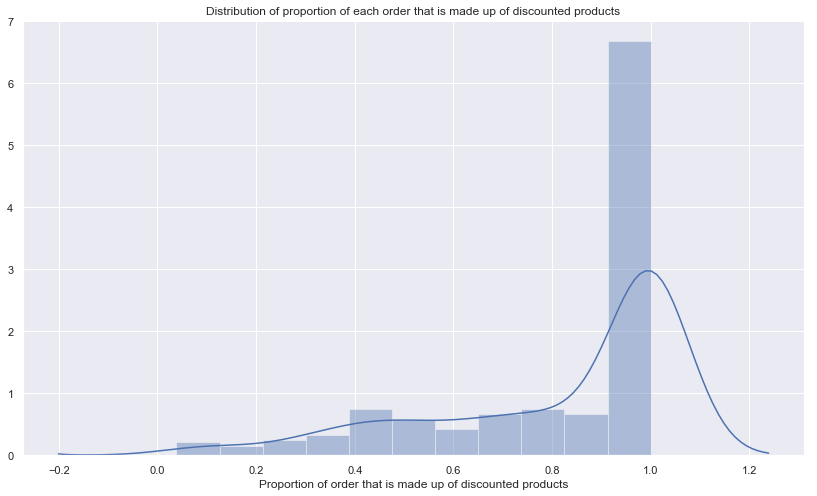

In [242]:
null_hyp_proportions = np.random.normal(loc=0.5, scale=np.std(list_of_proportions), size=len(disc_dict))

sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(14,8)})

#fig = sns.distplot(null_hyp_proportions)
fig = sns.distplot(list_of_proportions)
plt.xlabel("Proportion of order that is made up of discounted products")
plt.title("Distribution of proportion of each order that is made up of discounted products");

## Power simulation for Question 4

In [243]:
target = 0.95
sample_size  = 10
current = 0
n_sim = 800

In [244]:
np.random.seed(10)

power_sample = [] 

while current < target:
    data = np.empty([n_sim, sample_size, 2])
    data.fill(np.nan)

    # Hypothetical population with a mean proportion of 0.5
    data[:,:,0] = np.random.normal(loc=np.mean(null_hyp_proportions), scale=np.std(list_of_proportions), size=[n_sim, sample_size])

    # Actual data - list of proportions
    data[:,:,1] = np.random.normal(loc=np.mean(list_of_proportions), scale=np.std(list_of_proportions), size=[n_sim, sample_size])

    result = stats.ttest_ind(data[:, :, 0],data[:, :, 1],axis=1)
    p = result[1] 
    # Number of simulations where the null hypothesis was rejected

    rejects = np.sum(p/2 < alpha)

    # Calculate reject proportion

    reject_proportion = rejects/ float(n_sim) 
    current = reject_proportion 
    print ("Number of Samples:", sample_size,", Calculated Power =", current)
    power_sample.append([sample_size, current]) 
   
    # increase the number of samples for the next iteration of the loop
    sample_size += 1
    
power_sample[-1]

Number of Samples: 10 , Calculated Power = 0.875
Number of Samples: 11 , Calculated Power = 0.91625
Number of Samples: 12 , Calculated Power = 0.9125
Number of Samples: 13 , Calculated Power = 0.9325
Number of Samples: 14 , Calculated Power = 0.95875


[14, 0.95875]

The sample size required to detect an effect size of this magnitude is very small.

### A one-sample t-test can be used against a hypothetical population mean of 0.5.

In [252]:
def one_sample_t_test(sample,exp_mean):
    """ Runs a one-sample t-test.
    
    The first parameter shoudl be the sample, and the second is the assumed population mean.
    
    Prints a description of results. 
        
    """
    t_stat, p_value = stats.ttest_1samp(sample,exp_mean)
    
    if t_stat > 0:
        print('The mean of the sample is greater than the expected mean.')
    else:
        print('The mean of the sample is lower than the expected mean')
    if p_value/2 < alpha:
        print('The one-tailed p_value of ' + str(p_value/2) + ' is less than ' + str(alpha) + ' so the difference is statistically significant. \n')
    else:
        print('The one-tailed p_value of ' + str(p_value/2) + ' is NOT less than ' + str(alpha) + ' so the difference is not statistically significant. \n')

In [254]:
exp_mean = 0.5
samp_size = 15
prop_sample = np.random.choice(list_of_proportions, samp_size)
one_sample_t_test(prop_sample, exp_mean)

The mean of the sample is greater than the expected mean.
The one-tailed p_value of 0.0024551133823122687 is less than 0.05 so the difference is statistically significant. 



Perform t-test 100 times with different samples to check results:

In [255]:
reject_null_count = 0
fail_to_reject_count = 0
for i in list(range(100)):
    prop_sample = np.random.choice(list_of_proportions, samp_size)
    t_stat, p_value = stats.ttest_1samp(prop_sample,exp_mean)
    if p_value/2 < alpha:
        reject_null_count += 1
    else:
        fail_to_reject_count += 1

In [256]:
print('After 100 trials the null hypothesis is rejected ' + str(reject_null_count) + ' times')

After 100 trials the null hypothesis is rejected 100 times


### Question 4 Conclusion - There is sufficient evidence to suggest that when products are available at a discount, the proportion of a customer's order that will be made up of discounted products is significantly higher than 50%.

Furthermore, the proportion of a customer's order that will be made up of discounted products is between 80% and 85%.

(the full dataset of proportions is used to determine this)

In [249]:
props_to_test =[0.6, 0.7, 0.8, 0.85]

for i in props_to_test:
    print('Test against an assumed mean proportion of ' + str(i))
    prop_sample = list_of_proportions
    one_sample_t_test(prop_sample, i)


Test against an assumed mean proportion of 0.6
The mean of the sample is greater than the expected mean.
The one-tailed p_value of 7.685891469371536e-49 is less than 0.05 so the difference is statistically significant. 

Test against an assumed mean proportion of 0.7
The mean of the sample is greater than the expected mean.
The one-tailed p_value of 4.579042639193848e-19 is less than 0.05 so the difference is statistically significant. 

Test against an assumed mean proportion of 0.8
The mean of the sample is greater than the expected mean.
The one-tailed p_value of 0.04832701293538769 is less than 0.05 so the difference is statistically significant. 

Test against an assumed mean proportion of 0.85
The mean of the sample is lower than the expected mean
The one-tailed p_value of 0.015466312131681294 is less than 0.05 so the difference is statistically significant. 

